In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import numpy as np
from scipy.sparse import csc_matrix

In [3]:
import itertools

class Group:
    def __init__(self, *cartans):
        self.d = len(cartans[0])
        self.cartans = cartans
        
        self.evals = [x.diagonal() for x in cartans]
        self.evecs = [x for x in np.eye(self.d)]
        
        self.weights = [np.vstack(self.evals)[:,i].real for i in range(self.d)]
        
        self.roots_positive = self.get_positive_roots()
        self.roots = self.roots_positive+[-x for x in self.roots_positive]
        
    def get_positive_roots(self):
        w0 = self.weights[0]
        w_positive = [w0]+[w for w in self.weights[1:] if np.abs(w+w0).sum()>0]
        return [x[0]-x[1] for x in itertools.combinations(w_positive, 2) if np.abs(x[0]+x[1]).sum()>0]

In [7]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D
from utils.plot3d import _arrow3D
setattr(Axes3D,'arrow3D',_arrow3D)

%matplotlib notebook

def show_plot(data, title):    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.arrow3D(*data, mutation_scale=20, fc='red')
    ax.set_title(title)
    fig.tight_layout()
    plt.show()

In [8]:
from utils.cartan import make_cartans_suN, make_cartans_soN, make_cartans_spN

# Weights and Roots for SU(4)

<IPython.core.display.Javascript object>


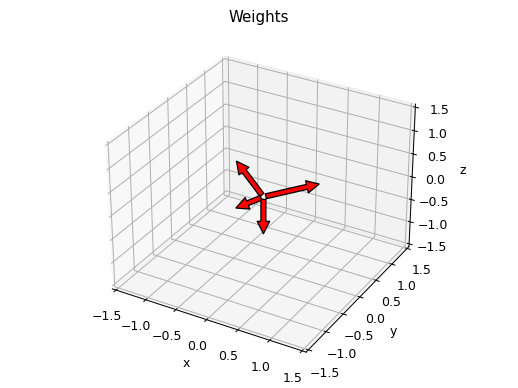

<IPython.core.display.Javascript object>


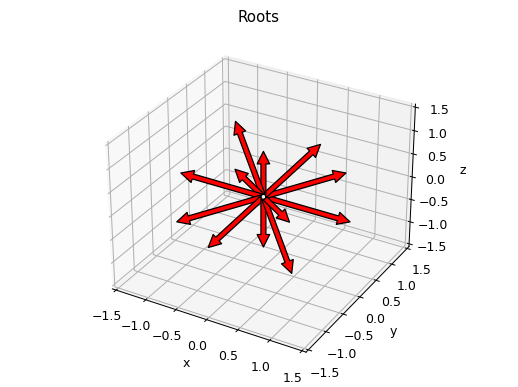

In [9]:
group = Group(*make_cartans_suN(4))

show_plot(group.weights, 'Weights')
show_plot(group.roots, 'Roots')

# Weights and Roots for SO(6)

<IPython.core.display.Javascript object>


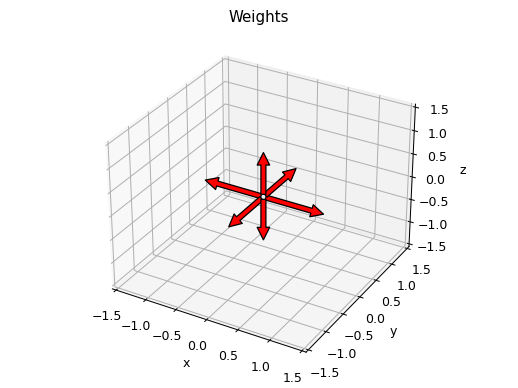

<IPython.core.display.Javascript object>


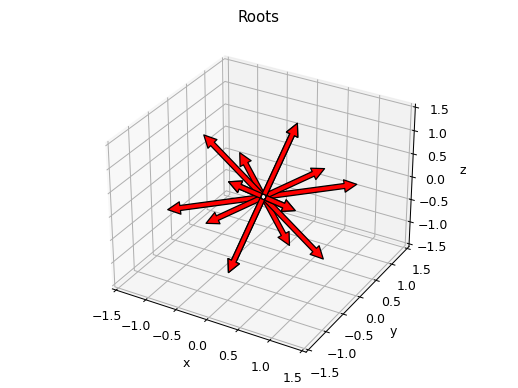

In [10]:
group = Group(*make_cartans_soN(6))

show_plot(group.weights, 'Weights')
show_plot(group.roots, 'Roots')

# Weights and Roots for SO(7)

<IPython.core.display.Javascript object>


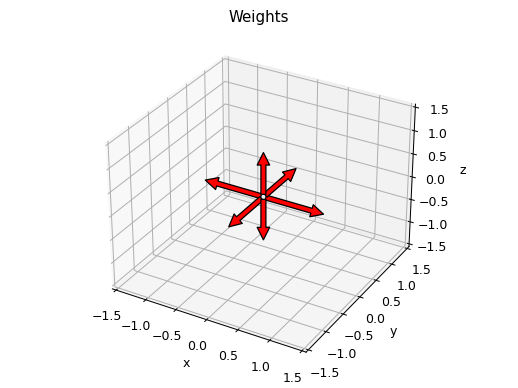

<IPython.core.display.Javascript object>


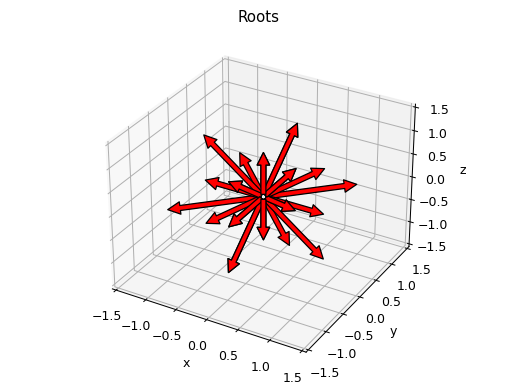

In [11]:
group = Group(*make_cartans_soN(7))

show_plot(group.weights, 'Weights')
show_plot(group.roots, 'Roots')